<a href="https://colab.research.google.com/github/mkhmaduwantha/MLCompetetion/blob/main/Code/PumpItUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [452]:
pip install category_encoders

In [453]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [454]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Prepare Dataset

## collecting data

In [455]:
# change the drive names
train_x = pd.read_csv('/content/drive/Shareddrives/M_ML/Pumpitup/data/train_set_val.csv')
train_y = pd.read_csv('/content/drive/Shareddrives/M_ML/Pumpitup/data/train_set_label.csv')
test_x = pd.read_csv('/content/drive/Shareddrives/M_ML/Pumpitup/data/test_set.csv')
df = pd.merge(train_x, train_y, on='id')
df_test = test_x

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## check null values

In [456]:
# Check if there is any missing values across each column
df.isnull().any()

id                       False
amount_tsh               False
date_recorded            False
funder                    True
gps_height               False
installer                 True
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage                True
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting            True
recorded_by              False
scheme_management         True
scheme_name               True
permit                    True
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_

In [457]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

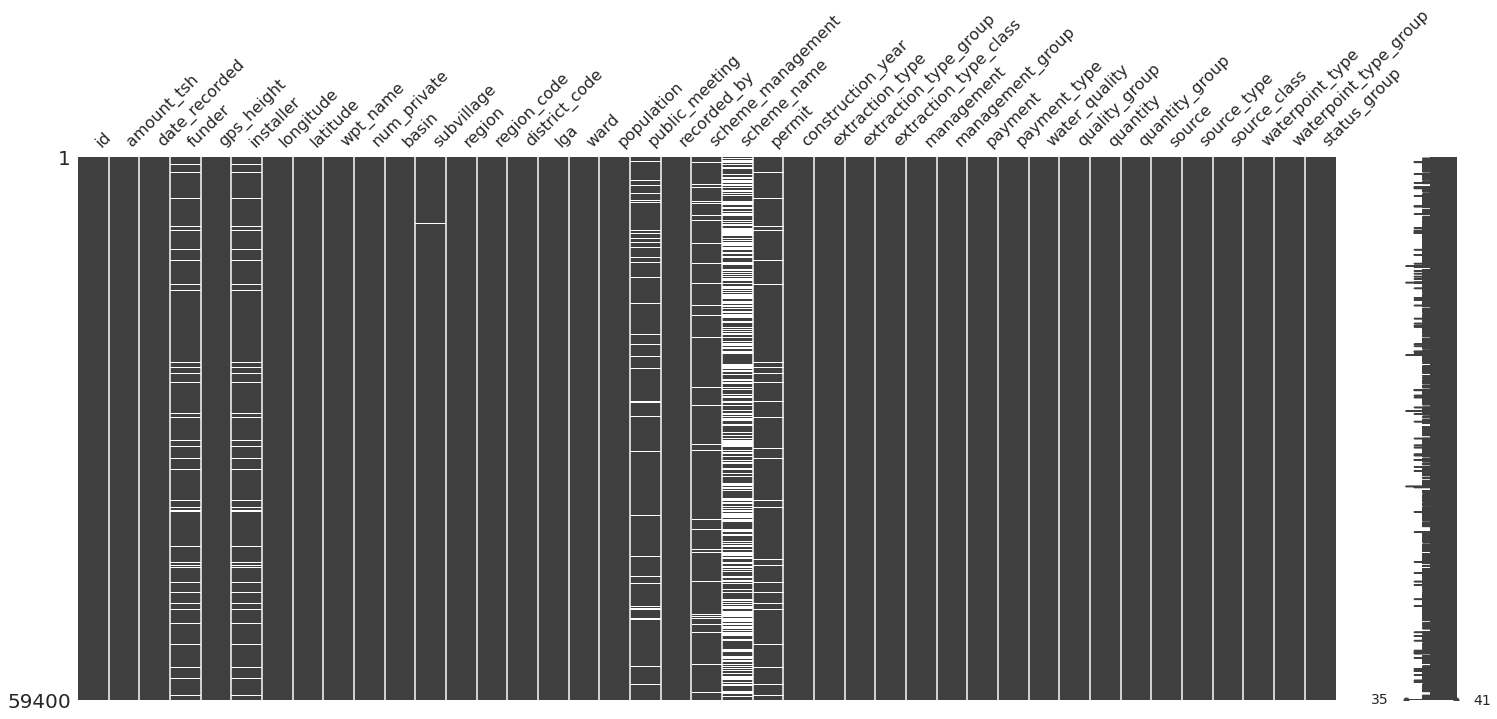

In [458]:
# Visualize missing values as a matrix
msno.matrix(df)

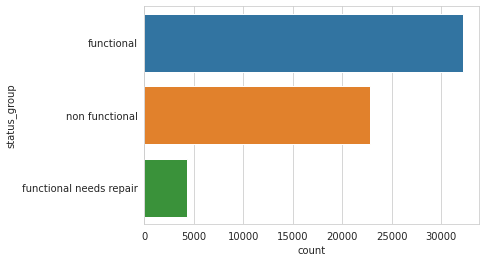

In [459]:
sns.set_style('whitegrid')
sns.countplot(y='status_group',data=df)

## Management columns



*   scheme_management - Who operates the waterpoint
*   management - How the waterpoint is managed
*   management_group - How the waterpoint is managed


In [460]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [461]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [462]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

`scheme_management and management have similar data.Also scheme_managemen contain includes null values.`

In [463]:
df.groupby(['management_group','management']).count()

id  ...  status_group
management_group management               ...              
commercial       company             685  ...           685
                 private operator   1971  ...          1971
                 trust                78  ...            78
                 water authority     904  ...           904
other            other               844  ...           844
                 other - school       99  ...            99
parastatal       parastatal         1768  ...          1768
unknown          unknown             561  ...           561
user-group       vwc               40507  ...         40507
                 water board        2933  ...          2933
                 wua                2535  ...          2535
                 wug                6515  ...          6515

[12 rows x 39 columns]

`we can remove managment_group as well, because it also has the same information as management.`

## Water Quanitiy column



*   quantity - The quantity of water
*   quantity_group - The quantity of water




In [464]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [465]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

`both are similar here we can remove quantity_group`

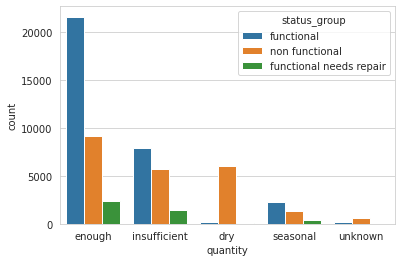

In [466]:
sns.countplot(x='quantity', hue='status_group', data=df)

## Source Column

compare the source, 
*   source - The source of the water
*   source_type - The source of the water
*   source_class - The source of the water


In [467]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [468]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [469]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [470]:
df.groupby(['source_class','source']).count()

id  ...  status_group
source_class source                       ...              
groundwater  hand dtw                874  ...           874
             machine dbh           11075  ...         11075
             shallow well          16824  ...         16824
             spring                17021  ...         17021
surface      dam                     656  ...           656
             lake                    765  ...           765
             rainwater harvesting   2295  ...          2295
             river                  9612  ...          9612
unknown      other                   212  ...           212
             unknown                  66  ...            66

[10 rows x 39 columns]

`they also keep the same info, so lets keep source only and remove source_class and source_type`


## Water Quality

compare, 

*   water_quality - The quality of the water
*   quality_group - The quality of the water





In [471]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [472]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [473]:
df.groupby(['quality_group','water_quality']).count()

id  ...  status_group
quality_group water_quality              ...              
colored       coloured              490  ...           490
fluoride      fluoride              200  ...           200
              fluoride abandoned     17  ...            17
good          soft                50818  ...         50818
milky         milky                 804  ...           804
salty         salty                4856  ...          4856
              salty abandoned       339  ...           339
unknown       unknown              1876  ...          1876

[8 rows x 39 columns]


`can remove quality_group`

## Payement

compare,

*   payment - What the water costs
*   payment_type - What the water costs



In [474]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [475]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

`can remove payment_type`

## Extraction

extraction_type - The kind of extraction the waterpoint uses
extraction_type_group - The kind of extraction the waterpoint uses
extraction_type_class - The kind of extraction the waterpoint uses

In [476]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [477]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [478]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [479]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  status_group
extraction_type_class extraction_type_group         ...              
gravity               gravity                26780  ...         26780
handpump              afridev                 1770  ...          1770
                      india mark ii           2400  ...          2400
                      india mark iii            98  ...            98
                      nira/tanira             8154  ...          8154
                      other handpump           364  ...           364
                      swn 80                  3670  ...          3670
motorpump             mono                    2865  ...          2865
                      other motorpump          122  ...           122
other                 other                   6430  ...          6430
rope pump             rope pump                451  ...           451
submersible           submersible             6179  ...          6179
wind-powered          wind-powered             117  ...           117

[13 rows x 39 columns]


`extraction_type has more unique values than extraction_type_group but there are values with very small amounts. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep.`

## Water Point

copare waterpoint types,

*   waterpoint_type - The kind of waterpoint
*   waterpoint_type_group - The kind of waterpoint




In [480]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [481]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [482]:
df.groupby(['waterpoint_type_group','waterpoint_type']).count()

id  ...  status_group
waterpoint_type_group waterpoint_type                     ...              
cattle trough         cattle trough                  116  ...           116
communal standpipe    communal standpipe           28522  ...         28522
                      communal standpipe multiple   6103  ...          6103
dam                   dam                              7  ...             7
hand pump             hand pump                    17488  ...         17488
improved spring       improved spring                784  ...           784
other                 other                         6380  ...          6380

[7 rows x 39 columns]

we can remove waterpoint_type_group

## Region

Compare following Data 
*   region - Geographic location
*   region_code - Geographic location (coded)


//includes geographical info of the water point



In [483]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [484]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [485]:
# df_daressalaam =df.loc[df['region']=='Dar es Salaam']

df.groupby(['region','region_code']).count()

id  ...  status_group
region        region_code        ...              
Arusha        2            3024  ...          3024
              24            326  ...           326
Dar es Salaam 7             805  ...           805
Dodoma        1            2201  ...          2201
Iringa        11           5294  ...          5294
Kagera        18           3316  ...          3316
Kigoma        16           2816  ...          2816
Kilimanjaro   3            4379  ...          4379
Lindi         8             300  ...           300
              18              8  ...             8
              80           1238  ...          1238
Manyara       21           1583  ...          1583
Mara          20           1969  ...          1969
Mbeya         12           4639  ...          4639
Morogoro      5            4006  ...          4006
Mtwara        9             390  ...           390
              90            917  ...           917
              99            423  ...           423
Mwanza        17             55  ...            55
              19           3047  ...          3047
Pwani         6            1609  ...          1609
              40              1  ...             1
              60           1025  ...          1025
Rukwa         15           1808  ...          1808
Ruvuma        10           2640  ...          2640
Shinyanga     11              6  ...             6
              14             20  ...            20
              17           4956  ...          4956
Singida       13           2093  ...          2093
Tabora        14           1959  ...          1959
Tanga         4            2513  ...          2513
              5              34  ...            34

[32 rows x 39 columns]

`lets remove region_code`

##Drop similar columns

In [486]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group','region_code'],inplace=True )

df_test.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group','region_code'],inplace=True )

## Construction year

construction_year - Year the waterpoint was constructed

In [487]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

`Zero shows the missing values. majority of the data is zero, so not replace with mean or median of full datset, instead find the mean of other data values , and replace zero with that mean.`

In [488]:
df['decade'] = df['construction_year']

df_test['decade'] = df['construction_year']

In [489]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)
#test
df_test['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_test['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_test['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_test['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_test['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_test['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [490]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [491]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,63.000000,30500.000000,2013.000000


In [492]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

df_test['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

## recorded by

recorded_by - Group entering this row of data

In [493]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

`recorded_by column only has one value.This will not give any information to the model`

In [494]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column
df_test.drop(columns=['recorded_by'],inplace=True ) 

## Installer

installer - Organization that installed the well

`there exist lot of null and missing values(0)`

In [495]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
df_test['installer'].fillna(value='Unknown',inplace=True)

In [496]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown
df_test['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [497]:

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [498]:
# Replacing the spelling mistakes and collect same categories in same name

df_test['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df_test['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df_test['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df_test['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df_test['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df_test['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df_test['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df_test['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df_test['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df_test['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df_test['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df_test['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df_test['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

`Correct spelling mistakes ctd.`

In [499]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [500]:
df_test['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df_test['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df_test['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df_test['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df_test['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df_test['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df_test['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df_test['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df_test['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df_test['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

`checked first 100 value counts of installer column and corrected the spelling mistakes`.

In [501]:
df['installer'].value_counts().head(25) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
LGA                     408
villagers               408
WEDECO                  397
TASAF                   396
Unicef                  332
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
Name: installer, dtype: int64

`lets consider first 20 values.`

In [502]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

df_test['installer_cat'] = df_test['installer']

In [503]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']
      

df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values other values to others   

df_test.loc[~df_test["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

`Now, we have new feature as installer_cat with 17 unique values.`

## funder

funder - Who funded the well

In [504]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

df_test['funder'].fillna(value='Unknown',inplace=True)
df_test['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [505]:
df['funder'].value_counts().head(25)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Name: funder, dtype: int64

`lets take most common 20 values .`

In [506]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column
df_test['funder_cat'] = df_test['funder']

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"
df_test.loc[~df_test["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [507]:
df['funder_cat'].nunique() # We have 21 unique values for this column

21

## longitude

longitude - GPS coordinate

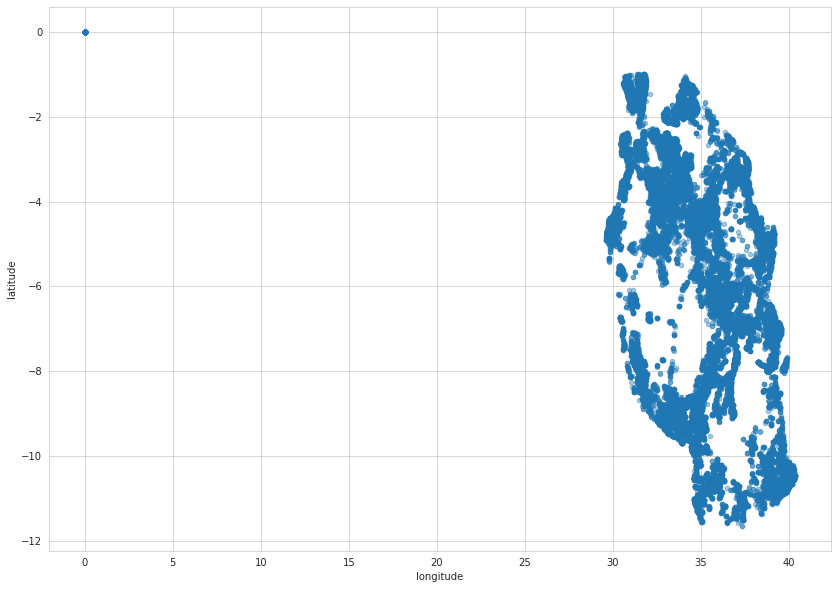

In [508]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [509]:
df.loc[df['longitude']==0] # to get outliers

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,installer_cat,funder_cat
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,functional,0,DWE,Dwsp
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,non functional,0,Government,Government Of Tanzania
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,functional,0,Others,Others
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,non functional,0,DWE,Others
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional needs repair,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,functional needs repair,0,DWE,Dwsp
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,functional,0,DWE,Dwsp
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,functional needs repair,0,DWE,Rwssp
59324,748,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,functional,0,world vision,World Vision


In [510]:
df.loc[df['longitude']!=0].describe() #  mean of non zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,80.000000,30500.000000,2013.000000


In [511]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # replace with mean
df_test['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

## drop id, wpt_name, scheme_name

*   id
*   wpt_name - Name of the waterpoint if there is one
*   scheme_name - Who operates the waterpoint


In [512]:
df['wpt_name'].value_counts()

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
                   ... 
Cosmas Mgekwa         1
Kwa Samweluvuti       1
Mwanza Barimi         1
Kwa Chimba            1
Ngatunga              1
Name: wpt_name, Length: 37400, dtype: int64

In [513]:
df['scheme_name'].value_counts()

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
Kihimika water supply            1
Ikuna gravity water project      1
Mugoma  spring source            1
PADEP(MIFUGO)                    1
African Barrick Gold             1
Name: scheme_name, Length: 2696, dtype: int64

In [514]:
df.duplicated(subset='id', keep='first').sum() # check duplicate values

0

In [515]:
df.drop(columns=['wpt_name','scheme_name','id'],inplace=True )
df_test.drop(columns=['wpt_name','scheme_name'],inplace=True )

## amount_tsh - total static head

`Total static head is the height of the flow from the surface.`

In [516]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

`drop this column because most of the instances has no informative values(means 0).`

In [517]:
df.drop(columns=['amount_tsh'],inplace=True )
df_test.drop(columns=['amount_tsh'],inplace=True )

## gps_height

gps_height - Altitude of the well

In [518]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [519]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [520]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64


`Gps height is the level of the water point from sea level. there are lot of zero values, but it seems to be most of the wells are at sea level.`

## Population

population - Population around the well

In [521]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [522]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


`there cant be zero population at functional wells.`

In [523]:
df.loc[df['population']!=0].describe() # mean of nonzero values

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [524]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #replacing 0 with mean
df_test['population'].replace(to_replace = 0 , value =281, inplace=True)

## date_recorded

date_recorded - The date the row was entered

`95% of the water points were recorded between 2011-2013. so lets drop this column for now.`

In [525]:
df.drop(columns=['date_recorded'],inplace=True )
df_test.drop(columns=['date_recorded'],inplace=True )

## num_private

`This column has no information about it and also mostly have zero values. So, we drop this also.`

In [526]:
df.drop(columns=['num_private'],inplace=True )
df_test.drop(columns=['num_private'],inplace=True )

## basin

basin - Geographic water basin

In [527]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

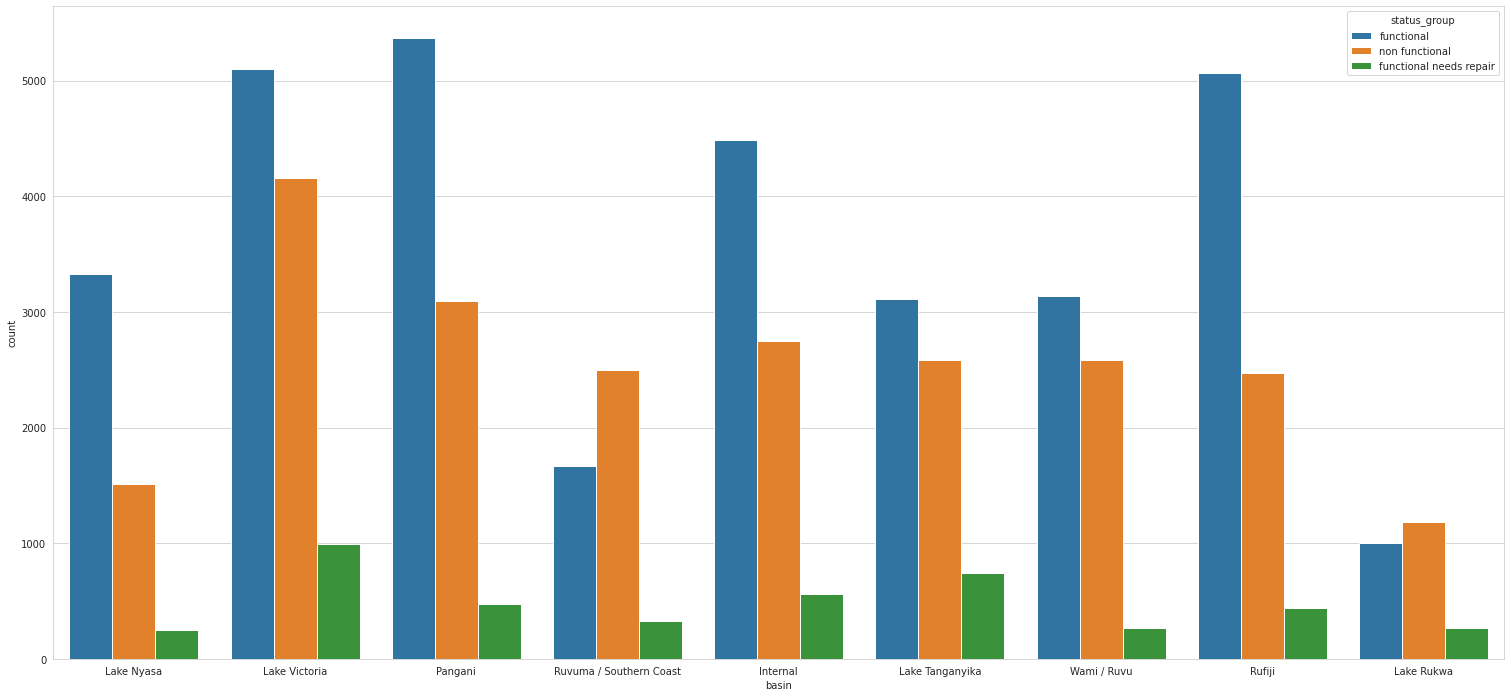

In [528]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

`there is correlation between functionality and geographical water basin.`

## subvillage - Geographic location

In [529]:
df['subvillage'].nunique()

19287

`have lot of nun unique values and since we have region to keep geoloacation data lets drop this`

In [530]:
df.drop(columns=['subvillage'],inplace=True )
df_test.drop(columns=['subvillage'],inplace=True )

## district_code - Geographic location (coded)

In [531]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

## lga, ward

*   lga - Geographic location
*   ward - Geographic location



`we have other features (region) that give geo location data. so lets drop these`

In [532]:

df.drop(columns=['lga','ward'],inplace=True ) # dropping lga and ward which has same information with regions
df_test.drop(columns=['lga','ward'],inplace=True )

## public_meeting - True/False

In [533]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

`lets convert null values to most common data.`

In [534]:
df['public_meeting'].fillna(value=True,inplace=True)
df_test['public_meeting'].fillna(value=True,inplace=True)

## permit - If the waterpoint is permitted

In [535]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

`letsconvert null values to mostcommon data type.`

In [536]:
df['permit'].fillna(value=True, inplace=True)
df_test['permit'].fillna(value=True, inplace=True)

## Converting Target to Ternary Values

In [537]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

## `And we create new csv file to keep our work and call new cleaned data.`

In [538]:
df.to_csv('/content/drive/Shareddrives/M_ML/Pumpitup/data/clean_data.csv')
df_test.to_csv('/content/drive/Shareddrives/M_ML/Pumpitup/data/clean_test_data.csv')

## Drop more columns

In [539]:
df.drop(columns=['funder','installer','construction_year'],inplace=True ) # drop these columns because we have created new features using these
df_test.drop(columns=['funder','installer','construction_year'],inplace=True )

# 2.Scaling and Encoding

In [540]:
df1= df.copy() 
#at the next steps maybe we can decide not to drop some columns so df assigned another dataframe to protect original

df1_test = df_test.copy()

In [541]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #converting from T/F to 0-1
df1_test['permit'] = df1_test['permit'].astype(bool).astype(int)

In [542]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #converting from T/F to 0-1
df1_test['public_meeting'] = df1_test['public_meeting'].astype(bool).astype(int)

In [543]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [544]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [545]:
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [546]:
# assign target
target='status_group'

In [547]:
# create final train set and test set
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

X_final_test=df1_test

In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [549]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, balanced_accuracy_score


from category_encoders import TargetEncoder


# scaler and encoder
scaler=RobustScaler()
encoder = TargetEncoder(cols=cat_col)

# assign numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# combine scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# Random Forest

In [550]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')



pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_train)


y_pred_test = pipe.predict(X_test)

# predictions on final test set
y_final_pred_test = pipe.predict(X_final_test)


print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


output = pd.DataFrame({'id':df_test.id,'status_group': y_final_pred_test})



/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Accuracy:
TRAIN: 0.9222643097643097
TEST: 0.7967171717171717

Balanced Accuracy:
TRAIN: 0.9357740575616479
TEST: 0.7113007439183336


In [551]:
target_status_group = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
output['status_group'] = output['status_group'].replace(target_status_group)

output.to_csv('/content/drive/Shareddrives/JAM/M_ML/Pumpitup/data/final_sumission_RF_1000.csv', index=False)

# XGBoost

In [552]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_train)


y_pred_test = pipe.predict(X_test)


y_final_pred_test = pipe.predict(X_final_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


output = pd.DataFrame({'id':df_test.id,'status_group': y_final_pred_test})


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Accuracy:
TRAIN: 0.8434974747474747
TEST: 0.8018518518518518

Balanced Accuracy:
TRAIN: 0.6840797548690926
TEST: 0.6314626674611675


In [553]:
target_status_group = {0:'functional', 
                   2:'non functional', 
                   1:'functional needs repair'} 
output['status_group'] = output['status_group'].replace(target_status_group)

output.to_csv('/content/drive/Shareddrives/JAM/M_ML/Pumpitup/data/final_sumission_XGB.csv', index=False)